In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import ffmpeg

## First load the video and convert it to numpy array

In [4]:
Video = cv2.VideoCapture('Video.mp4')
Frames = int(Video.get(cv2.CAP_PROP_FRAME_COUNT))
Length = int(Video.get(cv2.CAP_PROP_FRAME_HEIGHT))
Width  = int(Video.get(cv2.CAP_PROP_FRAME_WIDTH))
Frame_rate = int(Video.get(cv2.CAP_PROP_FPS))
Data = np.zeros((Frames, Length, Width), dtype=np.uint8)
for i in range(Frames):
    ret, frame = Video.read()
    if ret == True:
        Image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        Data[i] = Image
    else:
        break

## Create the Big Matrix 

In [9]:
A = np.zeros((Length * Width, Frames), dtype=np.uint8)
for i in range(Frames):
    A[:,i] = Data[i].reshape(Length * Width)

In [10]:
A

array([[68, 67, 67, ..., 45, 45, 45],
       [68, 67, 67, ..., 45, 45, 45],
       [68, 67, 67, ..., 45, 45, 45],
       ...,
       [ 3,  2, 16, ..., 16, 16, 22],
       [ 3,  2, 16, ..., 16, 16, 22],
       [ 3,  2, 16, ..., 16, 16, 22]], dtype=uint8)

In [11]:
A.shape

(921600, 51)

## Perform SVD

In [16]:
U,S,V = np.linalg.svd(A, full_matrices= False)

In [22]:
U@np.diag(S)@V

array([[68., 67., 67., ..., 45., 45., 45.],
       [68., 67., 67., ..., 45., 45., 45.],
       [68., 67., 67., ..., 45., 45., 45.],
       ...,
       [ 3.,  2., 16., ..., 16., 16., 22.],
       [ 3.,  2., 16., ..., 16., 16., 22.],
       [ 3.,  2., 16., ..., 16., 16., 22.]])

## Look at the singular values

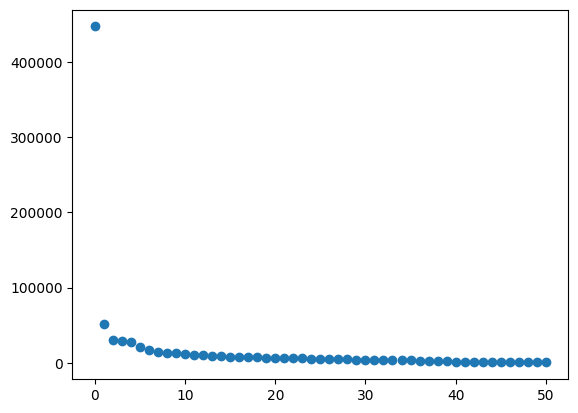

In [23]:
plt.scatter(np.arange(len(S)), S)
plt.show()

## Recreate the Video with 1, 5, 10 sigmas 

In [24]:
A_New = U[:, :1] * S[0] @ V[:1]
Image = np.zeros((Frames, Length, Width), dtype=np.unit8)
for i in range(Frames):
    

array([[69.0431633 , 75.57990061, 75.43825616, ..., 50.79714266,
        51.03039522, 52.0793712 ],
       [69.0431633 , 75.57990061, 75.43825616, ..., 50.79714266,
        51.03039522, 52.07937119],
       [69.0431633 , 75.57990061, 75.43825616, ..., 50.79714266,
        51.03039522, 52.07937119],
       ...,
       [21.73737294, 23.7953826 , 23.75078762, ..., 15.99284247,
        16.06627911, 16.39653602],
       [21.73737294, 23.7953826 , 23.75078762, ..., 15.99284247,
        16.06627911, 16.39653602],
       [21.73737294, 23.7953826 , 23.75078762, ..., 15.99284247,
        16.06627911, 16.39653602]])

## Convert back to video

In [30]:
(ffmpeg
.input('Temp/Image_%d.jpg', framerate=Frame_rate)
.output(f'Videos/{1}-sigular_values.mp4',loglevel='quiet')
.run(overwrite_output=True))

FileNotFoundError: [WinError 2] The system cannot find the file specified